# Codsoft Internship

Task 2 : Movie Rating Prediction.
Name: TUSHAR KUMAR GUPTA.

About - 
In this analysis, we will predict movie ratings using various features from our dataset. Our goal is to develop a model that can accurately estimate ratings based on factors such as genre, director, and cast. We will explore different algorithms to find the best approach for predicting how movies are rated by viewers.

# Importing libraries and reading csv file

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

In [170]:
#Readins csv file 
data = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Preliminary Data Analysis

In [171]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [172]:
data.shape

(15509, 10)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [174]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Preprocessing 

In [175]:
# Identifying missing values
total_missing = data.isnull().sum().sum()
print(f"Total missing values: {total_missing}")


Total missing values: 33523


In [176]:
# Handling missing values 
data.dropna(inplace= True)

In [177]:
# Removing commas using str.replace
# Converting the data type to int
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

In [178]:
# Removing duplicates from the data 
data.drop_duplicates(inplace = True)

In [179]:
# Data after making above changes
data.head()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 486.3+ KB


(5659, 10)

# Data Visualization

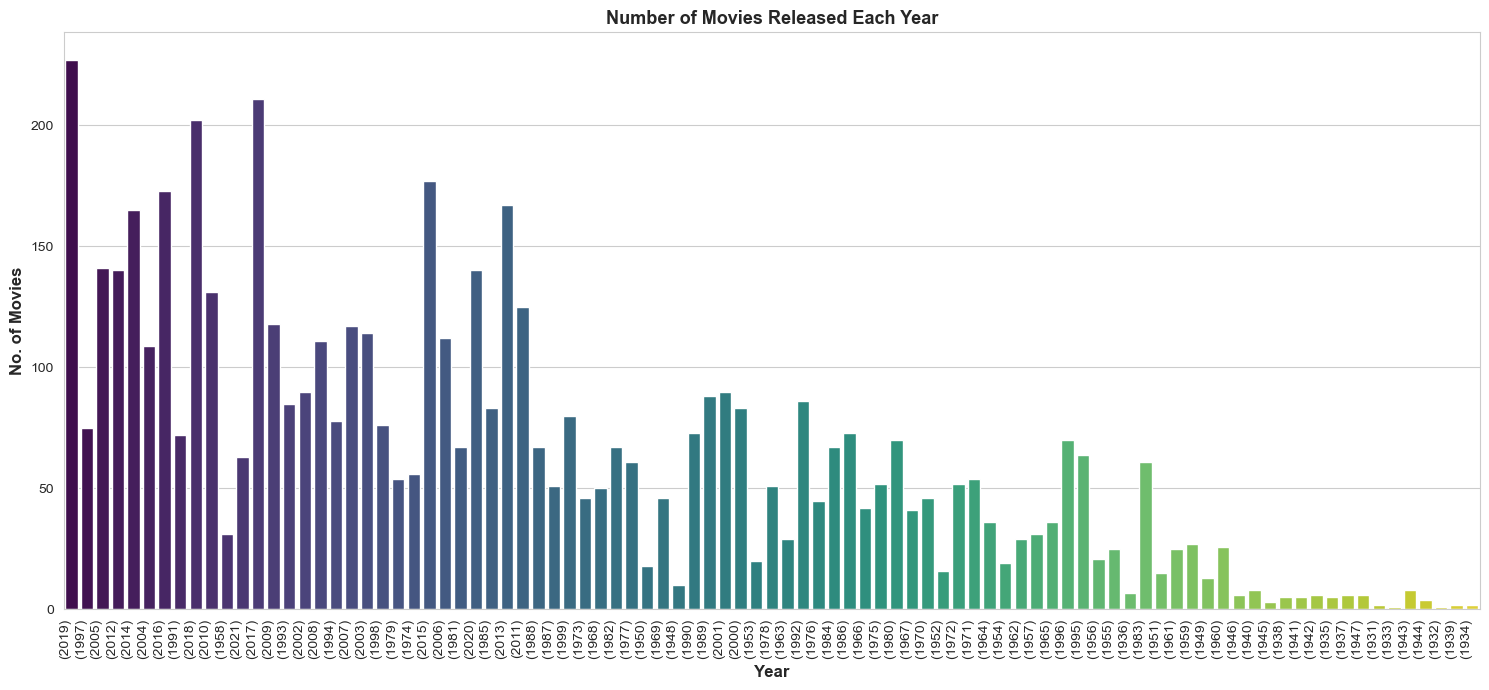

In [62]:
#Number of movies released each year

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.countplot(data=data, x='Year', palette='viridis')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('No. of Movies', fontsize=12, fontweight='bold')
plt.title('Number of Movies Released Each Year', fontsize=13, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

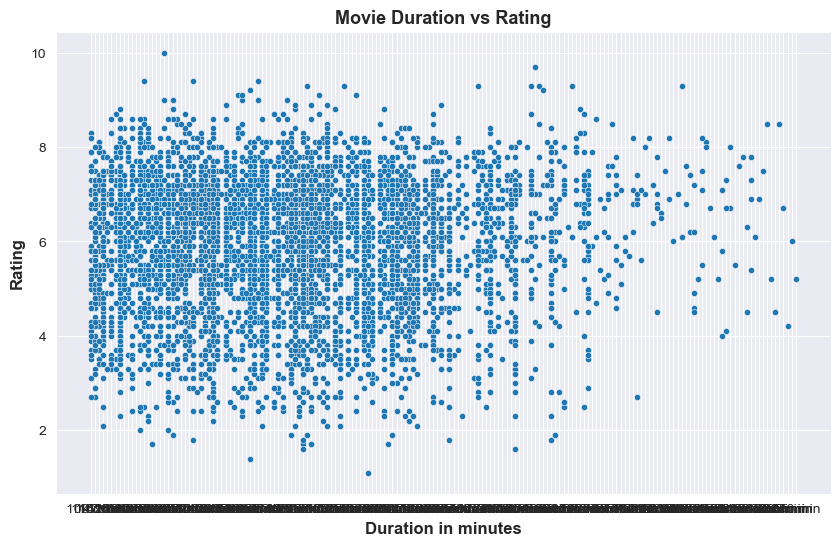

In [53]:
#Movie Duration vs Rating 

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.scatterplot(x='Duration', y='Rating', data=data, s=20,)
plt.xlabel('Duration in minutes', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.title('Movie Duration vs Rating', fontsize=13, fontweight='bold')

plt.show()


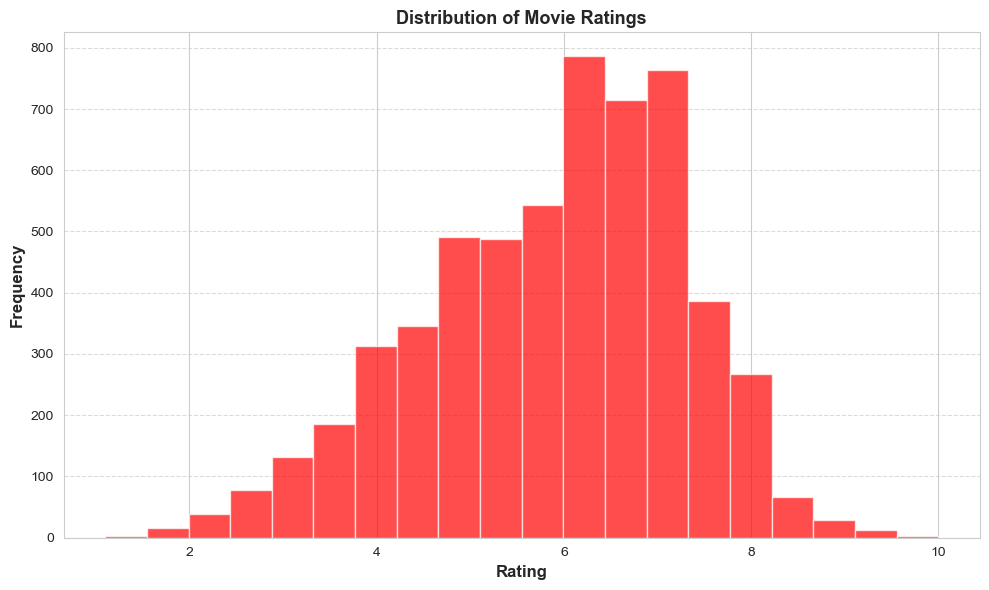

In [58]:
#Distribution of ratings

plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, color='red', alpha=0.7)
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Movie Ratings', fontsize=13, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


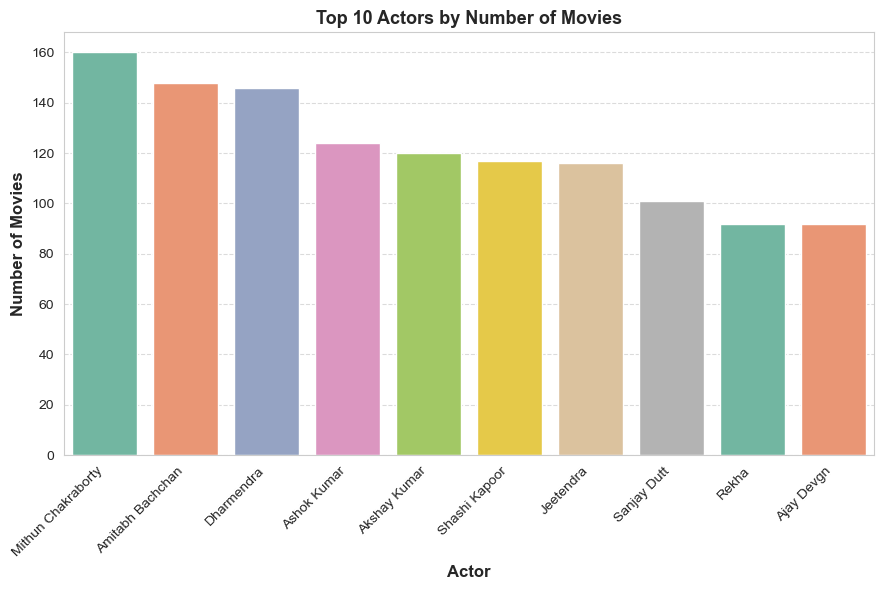

In [68]:
#Top Actors by Number of Movies

plt.figure(figsize=(9, 6))
sns.barplot(x=top_actors_count.index, y=top_actors_count.values, palette='Set2')
plt.xlabel('Actor', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Top 10 Actors by Number of Movies', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

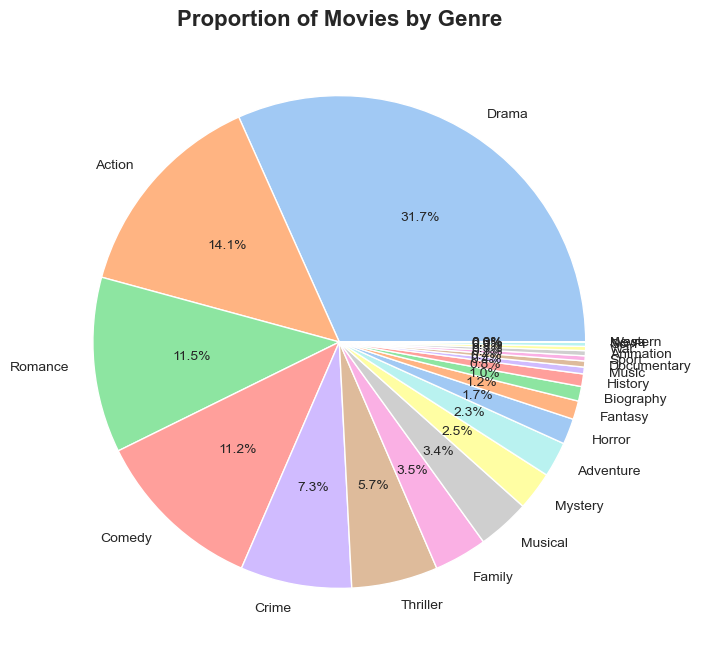

In [75]:
# Pie Chart of Genres

genre_counts = data['Genre'].dropna().str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Movies by Genre', fontsize=16, fontweight='bold')
plt.show()


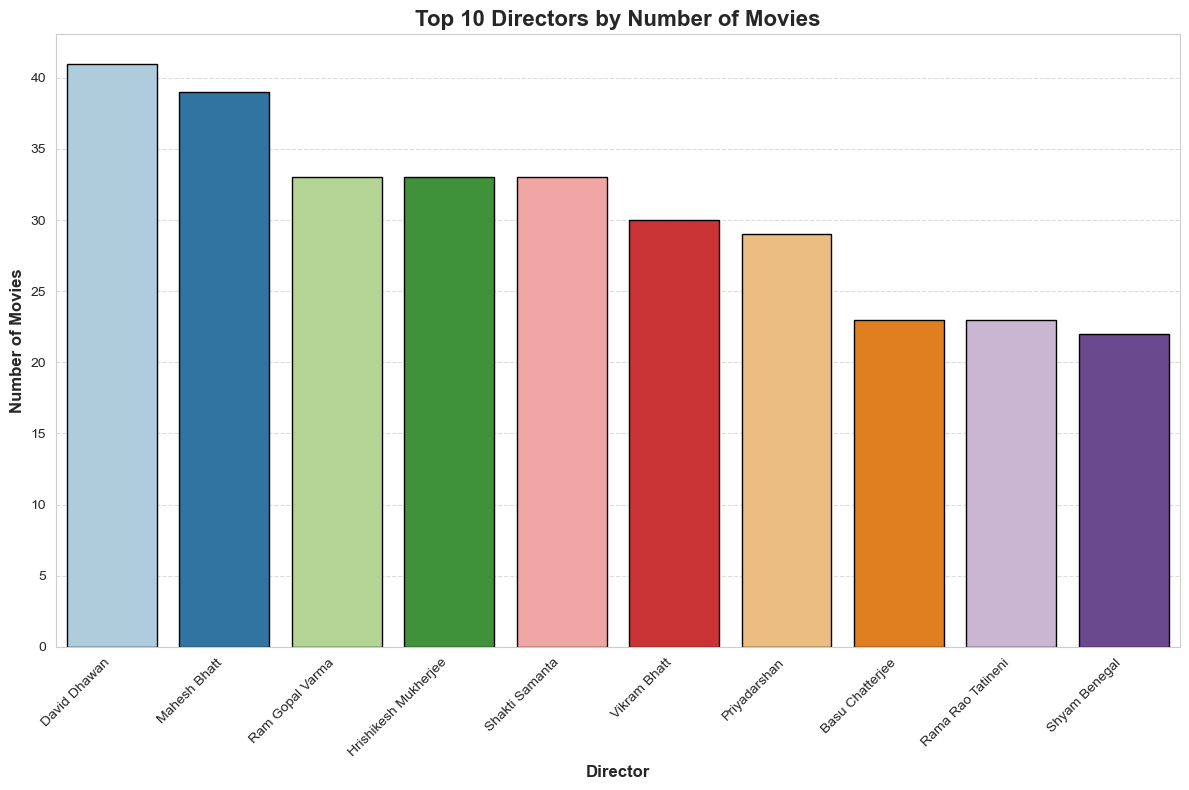

In [87]:
#Top Directors by number of movies 

top_directors = data['Director'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Paired', edgecolor='black')
plt.xlabel('Director', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Top 10 Directors by Number of Movies', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


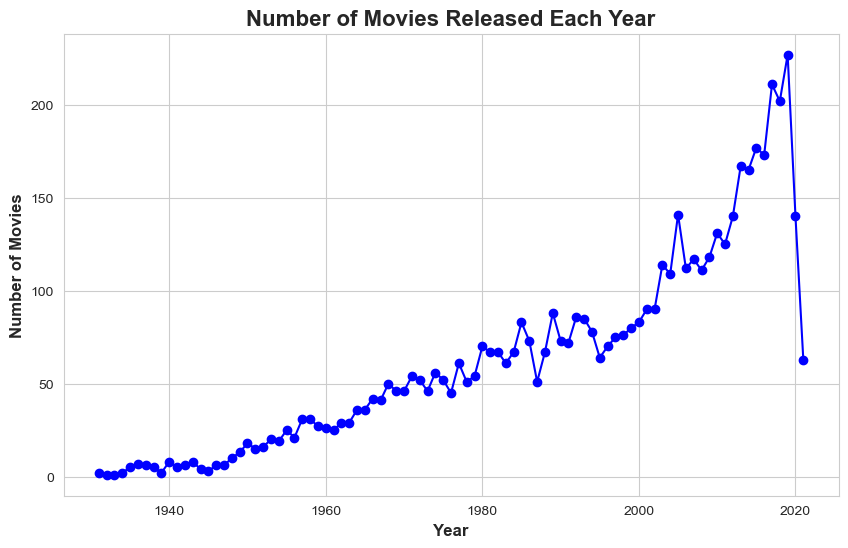

In [90]:
#Movies Released Over Time

plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Number of Movies Released Each Year', fontsize=16, fontweight='bold')
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Data Standardization

In [107]:
numerical_features = ['Votes']
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Checking the data after standardization
print(data.head())


                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                             #Yaaram  (2019)  110 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
8                  ?: A Question Mark  (2012)   82 min   

                       Genre  Rating     Votes        Director  \
1                      Drama     7.0 -0.197040   Gaurav Bakshi   
3            Comedy, Romance     4.4 -0.195062      Ovais Khan   
5     Comedy, Drama, Musical     4.7 -0.137041    Rahul Rawail   
6        Drama, Romance, War     7.4 -0.118067  Shoojit Sircar   
8  Horror, Mystery, Thriller     5.6 -0.173743   Allyson Patel   

           Actor 1                 Actor 2          Actor 3  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3          Prateik              Ishita Raj  Siddhant Kapoor  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Jim

# Train-test split

In [159]:
#Prdicting Ratings

X = data.drop('Rating', axis=1)  # Drop the target column from features
y = data['Rating']  # Define the target variable

# Handle categorical variables (e.g., Genre, Director, Actor 1, Actor 2, Actor 3)
X = pd.get_dummies(X, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (4527, 9648)
Testing features shape: (1132, 9648)
Training target shape: (4527,)
Testing target shape: (1132,)


# Done by Tushar Kumar Gupta